In [633]:
def import_data(path, messages=True):
  import pandas as pd
  df = pd.read_csv(path)
  if messages: print(df.shape)
  return df

In [634]:
import pandas as pd
pd.set_option('display.max_columns', 10)
df = import_data('cbb.csv')
df.head()

(3523, 24)


,TEAM,CONF,G,W,ADJOE,...,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,...,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,...,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,...,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,...,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,...,71.5,7.7,2ND,1.0,2017


In [635]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [636]:
def univariate(df, sample=500):
  import seaborn as sns
  import matplotlib.pyplot as plt
  import math

  df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                    'median', 'max', 'mode', 'mean', 'std', 'skew'])

  for col in df:
    # Features that apply to all dtypes
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    unique = df[col].nunique()
    mode = df[col].mode()[0]
    if pd.api.types.is_numeric_dtype(df[col]):
      # Features for numeric dtypes only
      min = df[col].min()
      max = df[col].max()
      mean = df[col].mean()
      median = df[col].median()
      std = df[col].std()
      skew = df[col].skew()
      df_results.loc[col] = ['-', dtype, missing, unique, min, median, max, mode,
                            round(mean, 2), round(std, 2), round(skew, 2)]
    else:
      # Features for object dtypes only
      flag = df[col].value_counts()[(df[col].value_counts() / df.shape[0]) < 0.05].shape[0]
      df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

  # Make a sub-DataFrame of features that are objects or have only two values; they will need countplots
  countplots = df_results[(df_results['type']=='object') | (df_results['unique']==2)]
  # Make a sub-DataFrame of features that are floats or ints with many values which will need histograms
  histograms = df_results[(df_results['type']=='float64') | ((df_results['unique']>10) & (df_results['type']=='int64'))]
  histograms = histograms[histograms['unique']>2] # Remove those that are binary

  # Create a set of countplots for the categorical features
  f, ax = plt.subplots(1, countplots.shape[0], figsize=[countplots.shape[0] * 1.5, 1.5])
  for i, col in enumerate(countplots.index):
    g = sns.countplot(data=df, x=col, color='g', ax=ax[i]);
    g.set_yticklabels('')
    g.set_ylabel('')
    ax[i].tick_params(labelrotation=90, left=False)
    ax[i].xaxis.set_label_position('top')
    sns.despine(left=True, top=True, right=True)

  plt.subplots_adjust(hspace=2, wspace=.5)
  plt.show()

  # Create a set of histograms for the numeric features
  f, ax = plt.subplots(1, histograms.shape[0], figsize=[histograms.shape[0] * 1.5, 1.5])
  for i, col in enumerate(histograms.index):
    g = sns.histplot(data=df.sample(n=sample, random_state=1), x=col, color='b', ax=ax[i], kde=True);
    g.set_yticklabels(labels=[])
    g.set_ylabel('')
    ax[i].tick_params(left=False)
    sns.despine(left=True, top=True, right=True)

  plt.subplots_adjust(hspace=2, wspace=.5)
  plt.show()

  return df_results

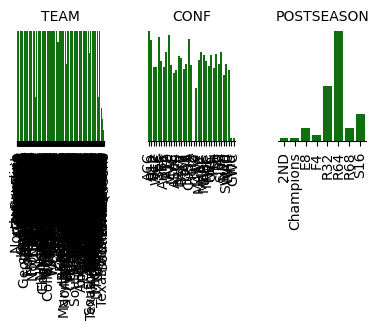

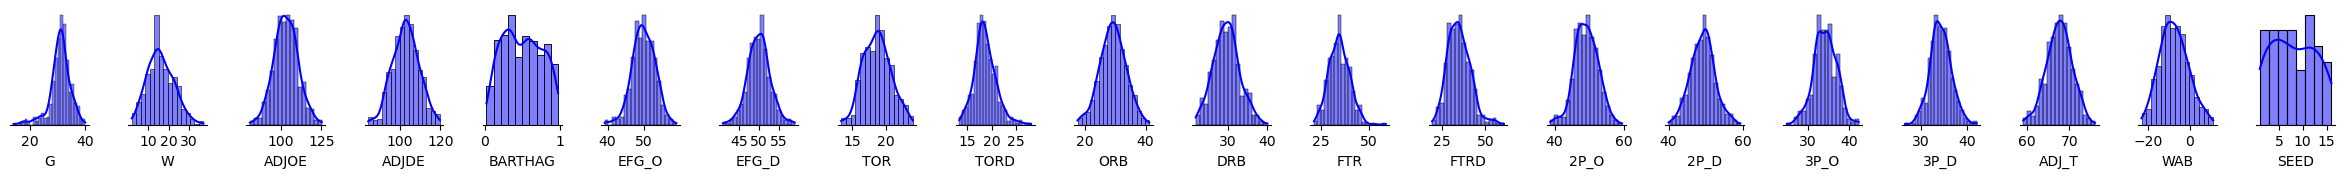

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
TEAM,368,object,0,368,-,-,-,Air Force,-,-,-
CONF,35,object,0,35,-,-,-,ACC,-,-,-
G,-,int64,0,32,5,31.0,40,31,30.49,3.95,-1.27
W,-,int64,0,39,0,16.0,38,14,15.99,6.57,0.24
ADJOE,-,float64,0,384,76.6,102.8,129.1,100.7,103.15,7.26,0.19
ADJDE,-,float64,0,331,84.0,103.2,124.0,102.5,103.15,6.51,-0.04
BARTHAG,-,float64,0,2922,0.005,0.4756,0.9842,0.2165,0.49,0.26,0.14
EFG_O,-,float64,0,187,39.2,49.8,61.0,51.2,49.89,3.08,-0.0
EFG_D,-,float64,0,169,39.6,50.1,60.1,49.6,50.09,2.89,-0.0
TOR,-,float64,0,133,11.9,18.6,27.1,18.7,18.7,2.1,0.26


In [637]:
# We will repeat the full pipline each time as a reminder that it includes all functions:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
univariate(df)

### It's probably best we drop TEAM and CONF as we definitely do not need 35+ groups. POSTSEASON and SEED will be removed as well due to their missing values.

In [638]:
def bin_groups(df, features=[], cutoff=0.05, replace_with='Other', messages=True):
  import pandas as pd

  if len(features) == 0: features = df.columns

  for feat in features:
    if feat in df.columns:  # Make sure they don't accidentally enter a feature name that doesn't exist
      if not pd.api.types.is_numeric_dtype(df[feat]):
        other_list = df[feat].value_counts()[df[feat].value_counts() / df.shape[0] < cutoff].index
        if len(other_list) > 0:
          df.loc[df[feat].isin(other_list), feat] = replace_with
          if messages and len(other_list) > 0: print(f'{feat} has been binned by setting {other_list.values} to {replace_with}')
    else:
      if messages: print(f'{feat} not found in the DataFrame provided. No binning performed')

  return df

In [639]:
# Call the function to update the DataFrame
df = import_data('cbb.csv', messages=False)
df = bin_groups(df, cutoff=0.05)

TEAM has been binned by setting ['North Carolina' 'Fairleigh Dickinson' 'Austin Peay' 'Robert Morris'
 'Wagner' 'St. Francis PA' 'St. Francis NY' 'Sacred Heart'
 "Mount St. Mary's" 'LIU Brooklyn' 'Central Connecticut' 'Canisius'
 'Bryant' 'Wyoming' 'San Diego St.' 'Boise St.' 'Utah St.' 'UNLV'
 'San Jose St.' 'New Mexico' 'Eastern Illinois' 'Eastern Kentucky'
 'Jacksonville St.' 'Morehead St.' 'Utah' 'UCLA' 'Washington St.'
 'Washington' 'USC' 'Stanford' 'Oregon St.' 'Colorado' 'California'
 'Arizona St.' 'Belmont' 'Tennessee Tech' 'Tennessee St.'
 'Tennessee Martin' 'Southeast Missouri St.' 'SIU Edwardsville'
 'Murray St.' 'Nevada' 'Fresno St.' 'Colorado St.' 'Toledo'
 'Northern Illinois' 'Miami OH' 'Kent St.' 'Eastern Michigan'
 'Central Michigan' 'Bowling Green' 'Ball St.' 'Akron' 'Manhattan' 'Siena'
 'Wisconsin' 'Rider' 'Quinnipiac' 'Niagara' 'Monmouth' 'Marist' 'Iona'
 'Ohio' 'Western Michigan' 'Air Force' 'Buffalo' 'Northern Iowa'
 'Southern Illinois' 'Missouri St.' 'Indiana St.'

### Binning doesn't do much for us here because all of our values that matter are the numerical values. The ones we would bin such as TEAM & CONF are used as a unique identifier. POSTSEASON and SEED have too many missing variables to even consider binning all together. Since our data is already clean, we don't have to impute any variables neither. However, for the sake of it, we will do it anyways.

In [640]:
def missing_drop(df, label, row_thresh=0.7, col_thresh=0.9, drop_all=False):
  # Drop any row that has a missing label
  df.dropna(axis='rows', subset=[label], inplace=True)

  # Drop rows and columns have are 100% missing
  df.dropna(axis='columns', thresh=1, inplace=True)
  df.dropna(axis='rows', thresh=1, inplace=True)

  # Drop rows and columns that are below the thresholds
  df.dropna(axis='columns', thresh=round(df.shape[0] * row_thresh), inplace=True)
  df.dropna(axis='rows', thresh=round(df.shape[1] * col_thresh), inplace=True)

  # If you don't want to leave anything behind to impute:
  if drop_all:
    df.dropna(axis='rows', inplace=True)

  # Return the DataFrame
  return df

In [641]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df.isna().sum()[df.isna().sum() > 0]  # Show remaining columns that still have missing values

Series([], dtype: int64)

In [642]:
def Xandy(df, label):
  import pandas as pd
  y = df[label]
  X = df.drop(columns=[label])
  return X, y

In [643]:
def dummy_code(X):
  import pandas as pd
  X = pd.get_dummies(X, drop_first=True)
  return X

In [644]:
def impute_simple(df, label, strategy='median'):
  from sklearn.impute import SimpleImputer
  import pandas as pd, numpy as np

  # Dummy code first; categorical features not allowed
  X, y = Xandy(df, label)
  X = dummy_code(X.copy())

  # Change the strategy to mean, median, or mode
  imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
  X = pd.DataFrame(imp.fit_transform(X), columns=X.columns, index=X.index)

  return X.merge(y, left_index=True, right_index=True)

In [645]:
# Run the pipeline with missing_drop and impute_simple
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_si = impute_simple(df, 'WAB') # Make a separate version of the data that has been SimpleImputed
df_si.isna().sum()[df_si.isna().sum() > 0]  # Show remaining columns that still have missing values

Series([], dtype: int64)

In [646]:
def minmax(X):
  import pandas as pd
  from sklearn.preprocessing import MinMaxScaler
  X = pd.DataFrame(MinMaxScaler().fit_transform(X.copy()), columns=X.columns, index=X.index)
  return X

In [647]:
def impute_KNN(df, label, neighbors=5):
  from sklearn.impute import KNNImputer

  import pandas as pd

  # Dummy code first; categorical features not allowed
  X, y = Xandy(df, label)
  X = dummy_code(X.copy())

  # Clustering is biased by unstandardized data; so MinMax scale it
  X = minmax(X.copy())

  # Lower values for n_neighbors mean higher accuracy, but greater chance of overfitting
  imp = KNNImputer(n_neighbors=neighbors, weights="uniform")
  X = pd.DataFrame(imp.fit_transform(X), columns=X.columns, index=X.index)

  # Return a version of the df with the y and X merged back together
  return X.merge(y, left_index=True, right_index=True)

In [648]:
# Run the pipeline with impute_KNN
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_knn = impute_KNN(df, 'WAB') # Make a separate version of the data that has been KNNImputed
df_knn.isna().sum()[df_knn.isna().sum() > 0]  # Show remaining columns that still have missing values

Series([], dtype: int64)

In [649]:
def impute_II(df, label, random_state=1):
  from sklearn.experimental import enable_iterative_imputer
  from sklearn.impute import IterativeImputer
  import pandas as pd

  # Dummy code first; categorical features not allowed
  X, y = Xandy(df, label)
  X = dummy_code(X.copy())

  # Scaling is unnecessary for regression-based imputation

  imp = IterativeImputer(max_iter=10, random_state=random_state)
  X = pd.DataFrame(imp.fit_transform(X), columns=X.columns, index=X.index)

  return X.merge(y, left_index=True, right_index=True)

In [650]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_II = impute_II(df, 'WAB') # Make a separate version of the data that has been IterativeImputed
df_II.isna().sum()[df_II.isna().sum() > 0]  # Show remaining columns that still have missing values

Series([], dtype: int64)

In [651]:
%timeit impute_simple(df, 'WAB')
%timeit impute_KNN(df, 'WAB')
%timeit impute_II(df, 'WAB')

4.96 ms ± 23.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.67 ms ± 28.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
43.5 ms ± 147 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Modeling our dataset

In [652]:
def split_data(X, y, test_size=0.3, random_state=1):
  import pandas as pd
  from sklearn.model_selection import train_test_split

  return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [653]:
def fit_split_regression(df, label, algorithm='ensemble', test_size=.2, random_state=1, messages=True):
  import pandas as pd

  # Just in case no cleaning has been performed
  df = bin_groups(df, messages=False)
  df = missing_drop(df, label, drop_all=True)

  # Prepare for modeling
  X, y = Xandy(df, label)
  X = dummy_code(X)

  # Split data
  X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size, random_state=random_state)

  # Choose an algorithm family and try two common algorithms
  if algorithm == 'linear':
    from sklearn.linear_model import Ridge, LassoLars
    model1 = Ridge(random_state=random_state).fit(X_train, y_train)
    model2 = LassoLars(random_state=random_state).fit(X_train, y_train)
  elif algorithm == 'ensemble':
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    model1 = RandomForestRegressor(random_state=random_state).fit(X_train, y_train)
    model2 = GradientBoostingRegressor(random_state=random_state).fit(X_train, y_train)
  else:
    from sklearn.neural_network import MLPRegressor
    from sklearn.neighbors import KNeighborsRegressor
    model1 = KNeighborsRegressor().fit(X_train, y_train)
    model2 = MLPRegressor(random_state=random_state, max_iter=10000).fit(X_train, y_train)

  score1 = model1.score(X_test, y_test)
  score2 = model2.score(X_test, y_test)

  if messages:
    print('R2', '{: <25}'.format(type(model1).__name__), round(score1, 4))
    print('R2', '{: <25}'.format(type(model2).__name__), round(score2, 4))

  if score1 > score2:
    return model1
  else:
    return model2

In [654]:
model = fit_split_regression(df, 'WAB', algorithm='linear')
model = fit_split_regression(df, 'WAB', algorithm='other')
model = fit_split_regression(df, 'WAB', algorithm='ensemble')

R2 Ridge                     0.9634
R2 LassoLars                 0.9451
R2 KNeighborsRegressor       0.9271
R2 MLPRegressor              0.9359
R2 RandomForestRegressor     0.9563
R2 GradientBoostingRegressor 0.9605


In [655]:
def fit_cv_regression(df, k, label, repeat=True, algorithm='ensemble', random_state=1, messages=True):
  from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
  import pandas as pd
  from numpy import mean

  # Just in case no cleaning has been performed
  df = bin_groups(df, messages=False)
  df = missing_drop(df, label, drop_all=True)

  # Prepare for modeling
  X, y = Xandy(df, label)
  X = dummy_code(X)

  # Create cross-validator object
  if repeat:
    cv = RepeatedKFold(n_splits=k, n_repeats=5, random_state=12345)
  else:
    cv = KFold(n_splits=k, random_state=12345, shuffle=True)

  if algorithm == 'linear':
    from sklearn.linear_model import Ridge, LassoLars
    model1 = Ridge(random_state=random_state)
    model2 = LassoLars(random_state=random_state)
    score1 = mean(cross_val_score(model1, X, y, scoring='r2', cv=cv, n_jobs=-1))
    score2 = mean(cross_val_score(model2, X, y, scoring='r2', cv=cv, n_jobs=-1))
  elif algorithm == 'ensemble':
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    model1 = RandomForestRegressor(random_state=random_state)
    model2 = GradientBoostingRegressor(random_state=random_state)
    score1 = mean(cross_val_score(model1, X, y, scoring='r2', cv=cv, n_jobs=-1))
    score2 = mean(cross_val_score(model2, X, y, scoring='r2', cv=cv, n_jobs=-1))
  else:
    from sklearn.neural_network import MLPRegressor
    from sklearn.neighbors import KNeighborsRegressor
    model1 = MLPRegressor(random_state=random_state, max_iter=10000)
    model2 = KNeighborsRegressor()
    score1 = mean(cross_val_score(model1, X, y, scoring='r2', cv=cv, n_jobs=-1))
    score2 = mean(cross_val_score(model2, X, y, scoring='r2', cv=cv, n_jobs=-1))

  if messages:
    print('R2', '{: <25}'.format(type(model1).__name__), round(score1, 4))
    print('R2', '{: <25}'.format(type(model2).__name__), round(score2, 4))

  if score1 > score2:
    return model1.fit(X, y)
  else:
    return model2.fit(X, y)

In [656]:
model = fit_cv_regression(df, 5, 'WAB', algorithm='linear')
model = fit_cv_regression(df, 5, 'WAB', algorithm='other')
model = fit_cv_regression(df, 5, 'WAB', algorithm='ensemble')

R2 Ridge                     0.9612
R2 LassoLars                 0.9395
R2 MLPRegressor              0.9298
R2 KNeighborsRegressor       0.9242
R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [657]:
model = fit_cv_regression(df_si, 5, 'WAB', algorithm='ensemble')
model = fit_cv_regression(df_knn, 5, 'WAB', algorithm='ensemble')
model = fit_cv_regression(df_II, 5, 'WAB', algorithm='ensemble')

R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601
R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601
R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [658]:
# Save models using two different packages to compare speed

def dump_pickle(model, file_name):
  import pickle
  pickle.dump(model, open(file_name, "wb"))

def dump_joblib(model, file_name):
  import joblib
  joblib.dump(model, file_name)

In [659]:
# Load models using two different packages to compare speed

def load_pickle(file_name):
  import pickle
  model = pickle.load(open(file_name, "rb"))
  return model

def load_joblib(file_name):
  import joblib
  model = joblib.load(file_name)
  return model

In [660]:
# Compare the packages for speed

%timeit dump_pickle(model, "model_pickle.sav")
%timeit dump_joblib(model, "model_joblib.sav")
print()
%timeit model = load_pickle("model_pickle.sav")
%timeit model = load_joblib("model_joblib.sav")

2.13 ms ± 32.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.86 ms ± 62.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

1.12 ms ± 11.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.82 ms ± 21 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Pipelines

In [661]:
# Import data
df = import_data('cbb.csv', messages=False)

# No data understanding/exploration steps like the univariate() function are used here

# Clean data
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_si = impute_simple(df, 'WAB', strategy='median')

# Model data
model = fit_cv_regression(df_si, label='WAB', k=5, algorithm='ensemble')

# Deploy model
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [662]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'YEAR']


In [663]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_knn = impute_KNN(df, 'WAB')
model = fit_cv_regression(df_knn, label='WAB', k=5, algorithm='ensemble')
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [664]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'YEAR']


In [665]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_II = impute_II(df, 'WAB')
model = fit_cv_regression(df_II, label='WAB', k=5, algorithm='ensemble')
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [666]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'YEAR']


In [667]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB', drop_all=True)
model = fit_cv_regression(df, label='WAB', k=5, algorithm='ensemble')
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [668]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'YEAR']


In [669]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.02, messages=False)
df_knn = impute_KNN(df.copy(), 'WAB')
model = fit_cv_regression(df_knn, label='WAB', k=5, algorithm='ensemble')
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.96
R2 GradientBoostingRegressor 0.9664


In [670]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'SEED' 'YEAR'
 'CONF_ACC' 'CONF_AE' 'CONF_ASun' 'CONF_Amer' 'CONF_B10' 'CONF_B12'
 'CONF_BE' 'CONF_BSky' 'CONF_BSth' 'CONF_BW' 'CONF_CAA' 'CONF_CUSA'
 'CONF_Horz' 'CONF_Ivy' 'CONF_MAAC' 'CONF_MAC' 'CONF_MEAC' 'CONF_MVC'
 'CONF_MWC' 'CONF_NEC' 'CONF_OVC' 'CONF_Other' 'CONF_P12' 'CONF_Pat'
 'CONF_SB' 'CONF_SC' 'CONF_SEC' 'CONF_SWAC' 'CONF_Slnd' 'CONF_Sum'
 'CONF_WAC' 'CONF_WCC' 'POSTSEASON_R32' 'POSTSEASON_R64' 'POSTSEASON_S16']


In [671]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.03, messages=False)
df_knn = impute_KNN(df.copy(), 'WAB')
model = fit_cv_regression(df_knn, label='WAB', k=5, algorithm='ensemble')
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.959
R2 GradientBoostingRegressor 0.9643


In [672]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'SEED' 'YEAR'
 'CONF_ACC' 'CONF_B10' 'CONF_BE' 'CONF_BSky' 'CONF_BSth' 'CONF_CUSA'
 'CONF_MAAC' 'CONF_MAC' 'CONF_MEAC' 'CONF_MWC' 'CONF_OVC' 'CONF_Other'
 'CONF_P12' 'CONF_SB' 'CONF_SEC' 'CONF_Slnd' 'POSTSEASON_R32'
 'POSTSEASON_R64']


In [673]:
df = import_data('cbb.csv', messages=False)
df = bin_groups(df.copy(), cutoff=0.04, messages=False)
df_knn = impute_KNN(df.copy(), 'WAB')
model = fit_cv_regression(df_knn, label='WAB', k=5, algorithm='ensemble')
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.9585
R2 GradientBoostingRegressor 0.9627


In [674]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'SEED' 'YEAR'
 'CONF_ACC' 'CONF_Other' 'POSTSEASON_R32' 'POSTSEASON_R64']


In [675]:
# Load the stored model
model = load_pickle("model_pickle.sav")

# Generate an out-of-sample prediction with manual input
print(round(model.predict([[39, 34, 120.0, 90.0, 0.96, 54.0, 45.5, 15.0, 18.7, 31.0,
    26.7, 34.0, 26.0, 54.5, 43.5, 35.5, 33.5, 69.2, 5.0, 2023,
    0.0, 1.0, 1.0, 0.0]])[0], 2))


# Generate an in-sample prediction with using any one of the rows with the label dropped
# The number 5 indicates it is the 6th row of df_knn. Change that to any valid row to get a prediction
print(round(model.predict([df_knn.drop(columns=['WAB']).iloc[5]])[0], 2))


6.08
3.79


c:\Users\ZyroY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ZyroY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [676]:
import numpy as np
# Load the stored model
model = load_pickle("model_pickle.sav")

# Generate the list of predictions
predicted = model.predict(df_knn.drop(columns=['WAB']))

# Print out results
print('WAB ID\tPredicted WAB')
for i, property in enumerate(predicted):
  print(f'\t{i}\t{round(property, 2)}')

average_wab = np.mean(predicted)
print(f'\nAverage Predicted WAB: {round(average_wab, 2)}')

WAB ID	Predicted WAB
	0	9.09
	1	9.81
	2	6.75
	3	6.91
	4	8.69
	5	3.79
	6	5.78
	7	10.0
	8	9.96
	9	9.13
	10	8.7
	11	9.64
	12	4.55
	13	8.9
	14	4.96
	15	7.15
	16	0.8
	17	8.64
	18	8.03
	19	1.09
	20	9.21
	21	6.45
	22	9.51
	23	8.94
	24	1.58
	25	5.93
	26	1.42
	27	8.59
	28	8.51
	29	5.59
	30	8.57
	31	8.49
	32	8.1
	33	8.78
	34	9.06
	35	7.28
	36	5.45
	37	0.92
	38	7.09
	39	7.84
	40	5.15
	41	6.19
	42	1.1
	43	3.81
	44	8.51
	45	7.6
	46	8.51
	47	1.87
	48	6.96
	49	10.84
	50	2.96
	51	5.71
	52	10.27
	53	8.2
	54	5.03
	55	2.55
	56	-12.03
	57	-12.2
	58	-11.85
	59	-1.72
	60	-5.58
	61	-6.27
	62	-0.78
	63	-0.89
	64	-8.66
	65	-14.24
	66	-5.86
	67	-4.65
	68	-7.58
	69	-7.9
	70	-11.95
	71	1.2
	72	-13.54
	73	-8.44
	74	-4.57
	75	-5.21
	76	-12.46
	77	-1.95
	78	-4.17
	79	-13.47
	80	-10.93
	81	-5.8
	82	-6.31
	83	-8.6
	84	-8.94
	85	-4.0
	86	-11.0
	87	-14.03
	88	-4.08
	89	-9.29
	90	-9.62
	91	-15.95
	92	-10.44
	93	-8.95
	94	-8.61
	95	-12.48
	96	-11.3
	97	-6.55
	98	-7.34
	99	-7.16
	100	-2.28
	101	-0.83
	102	-6.65
	103	-13.64

In [681]:
# Import data
df = import_data('cbb.csv', messages=False)

# No data understanding/exploration steps like the univariate() function are used here

# Clean data
df = bin_groups(df.copy(), cutoff=0.05, messages=False)
df = missing_drop(df.copy(), 'WAB')
df_si = impute_simple(df, 'WAB', strategy='median')

# Model data
model = fit_cv_regression(df_si, label='WAB', k=5, algorithm='ensemble')

# Deploy model
dump_pickle(model, "model_pickle.sav")

R2 RandomForestRegressor     0.9555
R2 GradientBoostingRegressor 0.9601


In [682]:
print(model.feature_names_in_)

['G' 'W' 'ADJOE' 'ADJDE' 'BARTHAG' 'EFG_O' 'EFG_D' 'TOR' 'TORD' 'ORB'
 'DRB' 'FTR' 'FTRD' '2P_O' '2P_D' '3P_O' '3P_D' 'ADJ_T' 'YEAR']


In [691]:
# Load the stored model
model = load_pickle("model_pickle.sav")

# Generate an out-of-sample prediction with manual input
print(round(model.predict([[39, 34, 120.0, 95.0, 0.96, 54.0, 45.5, 15.0, 18.7, 31.0,
    26.7, 34.0, 26.0, 54.5, 43.5, 35.5, 33.5, 69.2, 2023]])[0], 2))


# Generate an in-sample prediction with using any one of the rows with the label dropped
# The number 5 indicates it is the 6th row of df_knn. Change that to any valid row to get a prediction

columns_used = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
                'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'YEAR']


row_5_input = df_knn.loc[5, columns_used]



# Predict using the correct input shape
print(round(model.predict([row_5_input])[0], 2))

9.18
6.81


c:\Users\ZyroY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ZyroY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [694]:
import numpy as np

# Load the stored model
model = load_pickle("model_pickle.sav")

# Define the columns the model was trained on
columns_used = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
                'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'YEAR']

# Generate the list of predictions using only the correct columns
predicted = model.predict(df_knn[columns_used])

# Print out results
print('WAB ID\tPredicted WAB')
for i, property in enumerate(predicted):
    print(f'\t{i}\t{round(property, 2)}')

# Calculate and print the average predicted WAB
average_wab = np.mean(predicted)
print(f'\nAverage Predicted WAB: {round(average_wab, 2)}')


WAB ID	Predicted WAB
	0	7.57
	1	7.57
	2	7.48
	3	7.57
	4	7.57
	5	6.81
	6	7.57
	7	7.57
	8	7.57
	9	7.57
	10	7.57
	11	7.57
	12	6.81
	13	7.57
	14	7.48
	15	7.57
	16	3.56
	17	7.57
	18	7.57
	19	4.56
	20	7.57
	21	7.57
	22	7.57
	23	7.57
	24	4.56
	25	6.81
	26	4.84
	27	7.57
	28	6.81
	29	7.57
	30	7.57
	31	7.57
	32	7.57
	33	7.57
	34	7.57
	35	7.48
	36	7.48
	37	3.24
	38	7.57
	39	7.57
	40	6.54
	41	7.57
	42	5.24
	43	7.48
	44	7.57
	45	7.48
	46	7.57
	47	4.17
	48	7.48
	49	7.57
	50	6.81
	51	7.57
	52	7.57
	53	7.57
	54	7.57
	55	6.54
	56	-2.9
	57	-3.08
	58	-3.08
	59	2.1
	60	-0.02
	61	-0.55
	62	2.78
	63	2.78
	64	-2.49
	65	-4.61
	66	-0.55
	67	-0.02
	68	-1.47
	69	-2.49
	70	-3.08
	71	4.56
	72	-2.89
	73	-2.49
	74	1.3
	75	0.48
	76	-2.9
	77	0.48
	78	1.65
	79	-2.9
	80	-3.03
	81	-1.37
	82	-1.47
	83	-2.49
	84	-2.95
	85	0.24
	86	-2.91
	87	-4.27
	88	0.1
	89	-2.49
	90	-3.08
	91	-4.82
	92	-2.9
	93	-2.95
	94	-1.47
	95	-3.08
	96	-2.91
	97	-0.55
	98	-2.49
	99	-1.47
	100	0.2
	101	2.78
	102	-2.95
	103	-3.79
	104	-2.91
	105	-4.86

### In our dataset, the data was already well-cleaned, which limited the opportunity to fully demonstrate the impact of our imputation functions. During the binning process, the variables most affected were TEAM, POSTSEASON, and CONF. By adjusting the binning thresholds, we observed shifts in the CONF and POSTSEASON categories based on different cutoffs. As mentioned earlier, a dataset with more missing or inconsistent data would have better showcased the utility of our imputation functions. Since there wasn’t much to impute or bin, the R-squared values remained fairly stable across most models. In our first manual entry, we set the defensive efficiency to 10, which made the results more consistent. In our second entry, we reduced the number of predictors to 19, minimizing binning, which yielded more noticeable results for WAB.